# Problem Statement:
Apply k-means clustering to this dataset (k=10). Analyze the clusters and common properties found for each cluster with dataset at https://www.kaggle.com/moltean/fruits (ignore labels)

Parakh Gupta, parakhgupta.98@gmail.com

AI Technology and Systems, www.ai-techsystems.com

In [1]:
#importing necessary modules
import os
import random
import pathlib
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import pandas as pd

In [2]:
#path for fruits images folder in windows
data_root='fruits-360/'

In [3]:
#appending image of each type in list
y_unique = []
x_unique = []
for fruits in os.listdir(data_root+'Training'):
    for image in os.listdir(data_root+"Training/"+fruits):
        X=imread(data_root+"Training/"+fruits+"/"+image)
        x_unique.append(X)
        y_unique.append(fruits)
        break

In [4]:
len(x_unique)

114

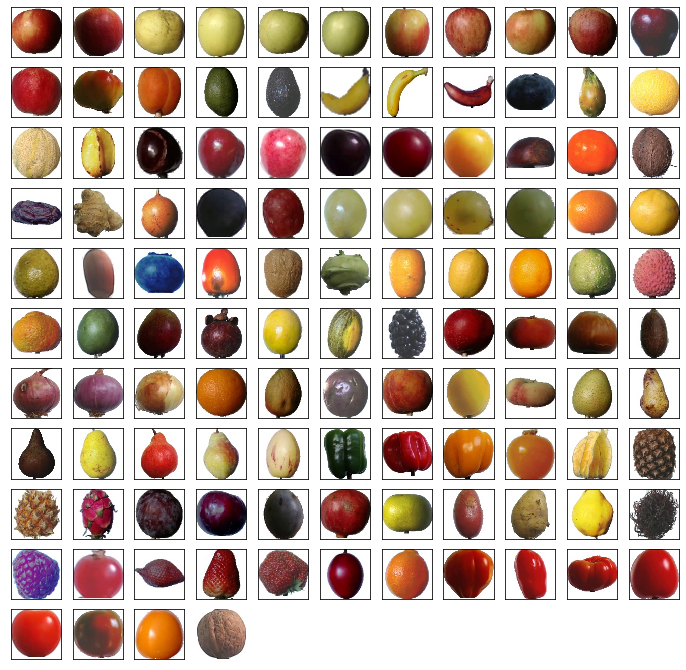

In [5]:
#plotting each type of fruit in the dataset
fig=plt.figure(figsize=(12,12))
for i in range(len(x_unique)):
    ax=fig.add_subplot(11,11,i+1)
    ax.imshow(x_unique[i])
    plt.xticks([])
    plt.yticks([])
plt.axis('off')
plt.show()
fig.savefig('fruits')

In [6]:
#image paths for training data
path=pathlib.Path(data_root+'Training')#path of folder
train_image_paths = list(path.glob('*/*'))
train_image_paths = [str(path) for path in train_image_paths]
random.shuffle(train_image_paths)

In [7]:
len(train_image_paths)

57276

In [8]:
#image paths for testing data
path=pathlib.Path(data_root+'Test')#path of folder
test_image_paths = list(path.glob('*/*'))
test_image_paths = [str(path) for path in test_image_paths]
random.shuffle(test_image_paths)

In [9]:
len(test_image_paths)

19548

In [10]:
def get_feature_list(paths,model):
    vgg16_feature_list = []
    print(len(paths))
    for img_path in paths:
        img = image.load_img(img_path, target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)
        vgg16_feature = model.predict(img_data)
        vgg16_feature_np = np.array(vgg16_feature)
        vgg16_feature_list.append(vgg16_feature_np.flatten())
    vgg16_feature_list_np = np.array(vgg16_feature_list)
    return vgg16_feature_list_np


In [11]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [12]:
#feature extraction using pretrained keras model
model = VGG16(weights='imagenet', include_top=False)
train_data = get_feature_list(training_image_paths,model)
test_data = get_feature_list(testing_image_paths,model)
#saved the output because calculation takes some time
np.save('train_data.npy',train_data)
np.save('test_data.npy',test_data)
#train_data=np.load('train_data.npy')
#test_data=np.load('test_data.npy')

W0813 19:15:17.833027 16512 deprecation_wrapper.py:119] From c:\users\parakh gupta\python3.6\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 19:15:17.890694 16512 deprecation_wrapper.py:119] From c:\users\parakh gupta\python3.6\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 19:15:17.896916 16512 deprecation_wrapper.py:119] From c:\users\parakh gupta\python3.6\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 19:15:17.956066 16512 deprecation_wrapper.py:119] From c:\users\parakh gupta\python3.6\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0813 19:15:18.601928 16512 deprecation_wrapper.py:

In [14]:
#importing dimension reduction module
from sklearn.decomposition import PCA

In [15]:
#applying PCA technique on our dataset
pca=PCA(n_components=2)

In [16]:
def reduce_data(data,pca):
    frames=[]
    for i in range(0,len(data),10000):
        x = pca.fit_transform(data[i:i+10000,:])
        df = pd.DataFrame(x)
        frames.append(df)
    result = pd.concat(frames)
    return result

In [18]:
#transforming the data into PCA transformed data
X_train=reduce_data(train_data,pca)

In [19]:
X_train.shape

(57276, 2)

In [20]:
#transforming the data into PCA transformed data
X_test=reduce_data(test_data,pca)

In [21]:
X_test.shape

(19548, 2)

In [22]:
#importing kmeans clustering
from sklearn.cluster import KMeans

In [23]:
#fitting the data
kmeans = KMeans(init='k-means++', n_clusters=10, max_iter=500)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
#storing assigned labels of each image in a cluster
Y_train=kmeans.labels_

In [25]:
Y_train.shape

(57276,)

In [26]:
#storing kmeans cluster centers
centroids = kmeans.cluster_centers_

In [27]:
for i in range(len(set(kmeans.labels_))):
  x=(kmeans.labels_==i)
  print(f'the number of images in {i} cluster is =',list(x).count(True))

the number of images in 0 cluster is = 7129
the number of images in 1 cluster is = 5035
the number of images in 2 cluster is = 6618
the number of images in 3 cluster is = 5236
the number of images in 4 cluster is = 4753
the number of images in 5 cluster is = 6885
the number of images in 6 cluster is = 7665
the number of images in 7 cluster is = 5697
the number of images in 8 cluster is = 5509
the number of images in 9 cluster is = 2749


In [28]:
def plot_result(X,Y,centeroids,name):
    fig=plt.figure(figsize=(10,7))
    plt.scatter(X[:,0],X[:,1], c=Y,s=1)
    plt.scatter(centroids[:, 0], centroids[:, 1],marker='o',s=50, linewidths=3,color='black',label='Centroid')
    plt.title('K-means clustering on the fruits dataset (PCA-reduced data)')
    plt.xlabel('PC1') 
    plt.ylabel('PC2') 
    plt.tight_layout()
    plt.legend()
    plt.show()
    fig.savefig(name)

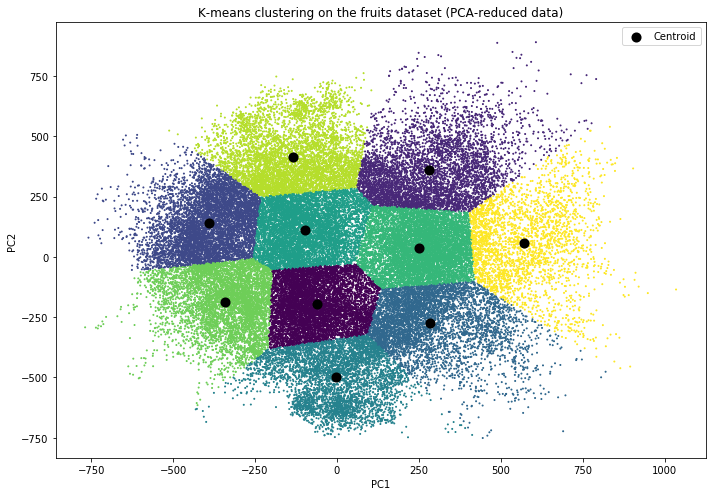

In [29]:
#plotting the cluster of training data
plot_result(X_train,Y_train,centroids,'train plot')

In [30]:
#predicting cluster for testing data
Y_test=kmeans.predict(X_test)

In [32]:
Y_test.shape

(19548,)

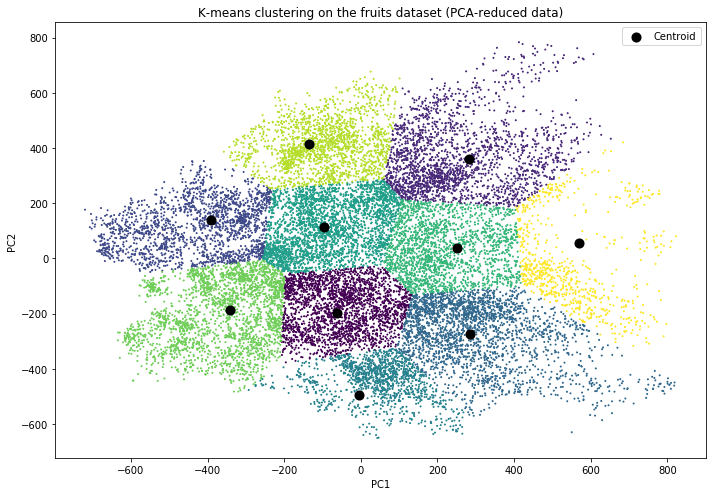

In [31]:
#plotting the cluster of testingg data
plot_result(X_test,Y_test,centroids,'test plot')